# Solución de ecuaciones diferenciales fraccionales

Algorithm for Extracting Corrosion Parameters from the Response of the Steel-Concrete System to a Current Pulse

V. Feliu J. A. Gonzalez,z and S. Feliu

Journal of The Electrochemical Society, 151 (3) B134-B140 2004


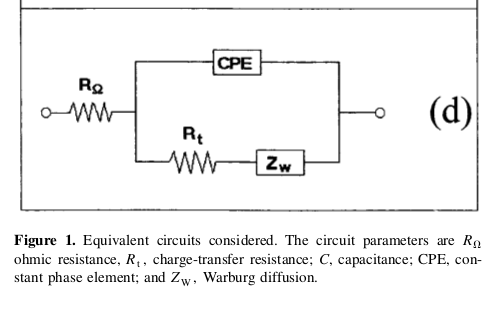

In [21]:
from IPython.display import Image
Image(filename="circuito-equivalente.png")

$\frac {d u(t)^{\beta + 0.5}} {d t ^{\beta + 0.5}} + x_3 \frac {d u(t)^{\beta}} {d t ^{\beta}} + x_2 \frac {d u(t)^{0.5}} {d t ^{0.5}} = x_1 \frac {d i(t)^{0.5}} {d t ^{0.5}} + x_1 x_3 i(t)$

## Operador derivada fraccional

$D^{\alpha} f(t) |_{t=kT} = \lim_{T \to 0} T^{-\alpha}\sum_{l=0}^{k} (-1)^{l} \binom{\alpha}{l}f[(k-l)T]  $

$ \binom{\alpha}{l} = \frac {\alpha (\alpha -1) ... (\alpha - l + 1)}{l!} $

#### Elimino el límite y saco de la sumatoria el elemento k-ésimo de la sumatoria 

Así queda que la derivada fraccional depende del valor actual de la función
y una sumatoria de términos que dependen de valores pasados de la función y el coeficiente binomial.

$\binom{\alpha}{0} = 1$

$D^{\alpha} f(t) |_{t=kT} = T^{-\alpha}(f[kT]) +\sum_{l=1}^{k} (-1)^{l} \binom{\alpha}{l}f[(k-l)T])  $

In [17]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#
#  Ecuación que calcula los coeficientes binomiales
#
def binomial (alfa, N):
    b = np.zeros(0)
    b0 = 1
    b = np.append (b, b0)
    for i in range (1,N):
        b = np.append (b, (1 - (1+alfa)/i)*b[i-1])    
    return b

In [3]:
#
# Parámetros de la simulación
#
T = 0.001; I0 = 1e-5
Rt = 1000; Rg = 500; R0 = 1e7;
Alfa = 0.5; CAlfa = 1e-8; 
Beta = 0.9; CBeta = 1e-6; 
N = 1000

# Inicialización 
vn0 =  np.zeros (N)
vn1 =  np.zeros (N)
vn2 =  np.zeros (N)

ii = np.zeros(N)
ii [0:int(0.2*N)] = I0


# Cálculo de los parámetros constantes
Gt = 1/Rt; Gg = 1/Rg; G0 = 1/R0
CAlfa = np.power(CAlfa, Alfa); GAlfa = CAlfa*np.power(T, -Alfa)
CBeta = np.power(CBeta, Beta); GBeta = CBeta*np.power(T, -Beta)


# Cálculo de los binomiales
M = 100
qAlfa = binomial (Alfa, M)
qBeta = binomial (Beta, M)

# Cálculo de matriz de impedancia
admitancia = np.array ([
                        [G0+Gg, -Gg,               0], 
                        [Gg,    -(Gg+GBeta+GAlfa), GAlfa], 
                        [0,     GAlfa,             -(GAlfa+Gt)
                         ]])
impedancia = np.linalg.inv(admitancia)

impedancia    

array([[ 862.90072275, -362.94386778, -275.74548809],
       [ 362.94386778, -362.96201498, -275.75927537],
       [ 275.74548809, -275.75927537, -449.76033531]])

In [4]:
#
# Cálculo de voltages de nodo inicial
#
current = np.array ([I0,0,0])
voltage = np.dot (impedancia, current)
vn0[0]  = voltage[0]
vn1[0]  = voltage[1]
vn2[0]  = voltage[2]

In [5]:
for k in range (1,N):
    vbeta = 0
    valfa = 0
    for l in range (1,k+1):
        if l < M:
            vbeta = vbeta + qBeta [l]*vn1 [k-l]
            valfa = valfa + qAlfa [l]*(vn1 [k-l] - vn2[k-l])
    current[0] = ii[k]
    current[1] = (GAlfa*valfa + GBeta*vbeta)
    current[2] = (-GAlfa*valfa)
    voltage = np.dot (impedancia, current)
    vn0[k] = voltage[0]
    vn1[k] = voltage[1]
    vn2[k] = voltage[2]

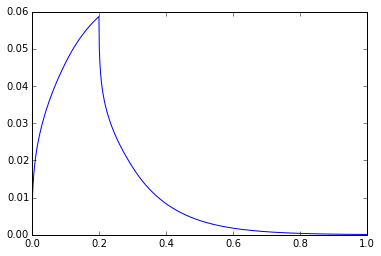

In [6]:
t = np.arange (N)*T
plt.plot(t,vn0)

In [7]:
vvn0= np.copy(vn0)

In [8]:
class RandlesFrac (object):
    def __init__ (self, Ti, Ni, Rti, Rgi, R0i, Alfai, Calfai, Betai, Cbetai, I0i):
        self.T = Ti;   self.I0 = I0i
        self.Rt = Rti; self.Rg = Rgi; self.R0 = R0i
        self.Alfa = Alfai; self.CAlfa = Calfai
        self.Beta = Betai; self.CBeta = Cbetai
        self.N = Ni
        
        # Inicialización 
        self.vn0 =  np.zeros (self.N)
        self.vn1 =  np.zeros (self.N)
        self.vn2 =  np.zeros (self.N)
        
        self.ii = np.zeros(self.N)
        self.ii [0:int(0.2*self.N)] = self.I0

        # Cálculo de los parámetros constantes
        self.Gt = 1/self.Rt; self.Gg = 1/self.Rg; self.G0 = 1/self.R0
        self.CAlfa = np.power(self.CAlfa, self.Alfa)
        self.GAlfa = self.CAlfa*np.power(self.T, -self.Alfa)
        self.CBeta = np.power(self.CBeta, self.Beta)
        self.GBeta = self.CBeta*np.power(self.T, -self.Beta)

        # Cálculo de los binomiales
        self.M = 100
        self.qAlfa = self.binomial (self.Alfa, self.M)
        self.qBeta = self.binomial (self.Beta, self.M)
        
        # Cálculo de matriz de impedancia
        self.admitancia = np.array ([
                        [self.G0 + self.Gg, -self.Gg,                            0], 
                        [self.Gg, -(self.Gg + self.GBeta + self.GAlfa), self.GAlfa], 
                        [0,     self.GAlfa,             -(self.GAlfa + self.Gt)]
                         ])
        self.impedancia = np.linalg.inv(self.admitancia)
        
        
    #
    #  Ecuación que calcula los coeficientes binomiales
    #
    def binomial (self,alfa, N):
        b = np.zeros(0)
        b0 = 1
        b = np.append (b, b0)
        for i in range (1,N):
            b = np.append (b, (1 - (1+alfa)/i)*b[i-1])    
        return b

    def simulacion (self):
        print ("simulacion fraccional")
        #
        # Cálculo de voltages de nodo inicial
        #
        self.current = np.array ([self.I0,0,0])
        self.voltage = np.dot (self.impedancia, self.current)
        self.vn0[0]  = self.voltage[0]
        self.vn1[0]  = self.voltage[1]
        self.vn2[0]  = self.voltage[2]
        
        for k in range (1,self.N):
            vbeta = 0
            valfa = 0
            for l in range (1,k+1):
                if l < self.M:
                    vbeta = vbeta + self.qBeta [l]*self.vn1 [k-l]
                    valfa = valfa + self.qAlfa [l]*(self.vn1 [k-l] - self.vn2[k-l])
            self.current[0] = self.ii[k]
            self.current[1] = (self.GAlfa*valfa + self.GBeta*vbeta)
            self.current[2] = (-self.GAlfa*valfa)
            self.voltage = np.dot (self.impedancia, self.current)
            self.vn0[k] = self.voltage[0]
            self.vn1[k] = self.voltage[1]
            self.vn2[k] = self.voltage[2]

In [9]:
T = 0.001; N = 1000; I0 = 1e-5; R0 = 1e7; alfa = .5
t = np.arange (N)*T
#
#                  Ti, Ni, Rti, Rgi, R0i, Alfai, Calfai, Betai, Cbetai, I0i
#
randles1 = RandlesFrac(T, N, 1000, 5000, R0, alfa, 1e-8, .9, 1e-6, I0)
randles2 = RandlesFrac(T, N, 1000, 5000, R0, alfa, 1e-8, .8, 1e-6, I0)
randles3 = RandlesFrac(T, N, 1000, 5000, R0, alfa, 1e-8, .7, 1e-6, I0)

In [10]:
randles1.simulacion()
randles2.simulacion()
randles3.simulacion()

simulacion fraccional
simulacion fraccional
simulacion fraccional


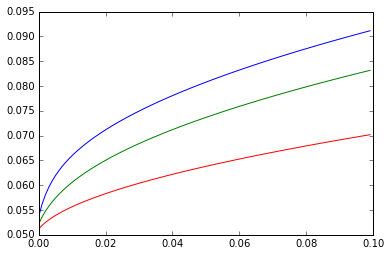

In [11]:
plt.plot(t[0:100],randles1.vn0[0:100])
plt.plot(t[0:100],randles2.vn0[0:100])
plt.plot(t[0:100],randles3.vn0[0:100])


In [12]:
#
#                  Ti, Ni, Rti, Rgi, R0i, Alfai, Calfai, Betai, Cbetai, I0i
#
randles4 = RandlesFrac(T, N, 100, 5000, R0, alfa, 1e-8, .6, 1e-6, I0)
randles5 = RandlesFrac(T, N, 1000, 5000, R0, alfa, 1e-8, .6, 1e-6, I0)
randles6 = RandlesFrac(T, N, 10000, 5000, R0, alfa, 1e-8, .6, 1e-6, I0)

In [13]:
randles4.simulacion()
randles5.simulacion()
randles6.simulacion()

simulacion fraccional
simulacion fraccional
simulacion fraccional


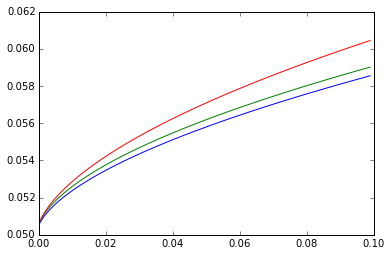

In [119]:
plt.plot(t[0:100],randles4.vn0[0:100])
plt.plot(t[0:100],randles5.vn0[0:100])
plt.plot(t[0:100],randles6.vn0[0:100])

In [179]:
class RandlesIdeal (RandlesFrac):
    
    def __init__ (self, Ti, Ni, Rti, Rgi, R0i, Calfai, Cbetai, I0i):
        
        self.T = Ti; self.I0 = I0i       
        self.Rt = Rti; self.Rg = Rgi; self.R0 = R0i
        self.CAlfa = Calfai
        self.CBeta = Cbetai
        self.N = Ni
        
        # Inicialización 
        self.vn0 =  np.zeros (self.N)
        self.vn1 =  np.zeros (self.N)
        self.vn2 =  np.zeros (self.N)
        
        self.ii = np.zeros(self.N)
        self.ii [0:int(0.2*self.N)] = self.I0

        # Cálculo de los parámetros constantes
        self.Gt = 1/self.Rt; self.Gg = 1/self.Rg; self.G0 = 1/self.R0
         
        self.GAlfa = self.CAlfa/self.T
         
        self.GBeta = self.CBeta/self.T

        # Cálculo de matriz de impedancia
        self.admitancia = np.array ([[self.G0 + self.Gg, -self.Gg,               0], 
                        [self.Gg, -(self.Gg + self.GBeta + self.GAlfa), self.GAlfa], 
                        [0,     self.GAlfa,             -(self.GAlfa + self.Gt)]])
        self.impedancia = np.linalg.inv(self.admitancia)    
        
    def simulacion (self):
        print ("simulacion ideal")
        #
        # Cálculo de voltages de nodo inicial
        #
        self.current = np.array ([self.I0,0,0])
        self.voltage = np.dot (self.impedancia, self.current)
        self.vn0[0]  = self.voltage[0]
        self.vn1[0]  = self.voltage[1]
        self.vn2[0]  = self.voltage[2]
    
        for k in range (1,self.N):
            
            ialfa = self.GAlfa * (self.vn1[k-1] - self.vn2[k-1])
            ibeta = self.GBeta * self.vn1[k-1]
            
            
            self.current[0] = self.ii[k]
            self.current[1] = -(ialfa + ibeta ) #-(self.GAlfa*valfa + self.GBeta*vbeta)
            self.current[2] = ialfa #(self.GAlfa*valfa)
            self.voltage = np.dot (self.impedancia, self.current)
            self.vn0[k] = self.voltage[0]
            self.vn1[k] = self.voltage[1]
            self.vn2[k] = self.voltage[2]

In [267]:
# Ti, Ni, Rti, Rgi, R0i, Calfai, Cbetai, I0i
T = 1e-4; N = int(1e4)
randles11 = RandlesIdeal(T, N, 10000, 5000, R0,      1e-4,      1e-5, I0)
randles6 =  RandlesFrac (T, N, 10000, 5000, R0, .50, 1e-4, .95, 1e-5, I0) 

In [268]:
randles11.simulacion()
randles6.simulacion()

simulacion ideal


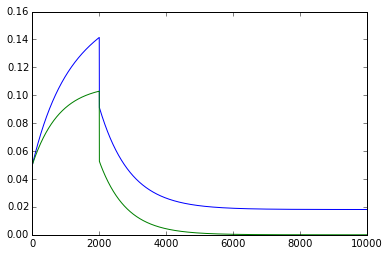

In [269]:
plt.plot(randles11.vn0)
plt.plot(randles6.vn0)

simulacion ideal


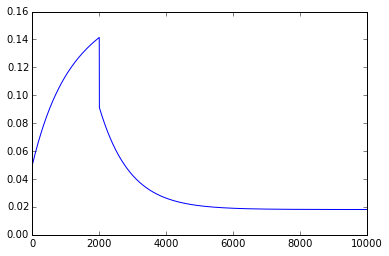

In [263]:
# Ti, Ni, Rti, Rgi, R0i, Calfai, Cbetai, I0i
T = 1e-4; N = int(1e4)
randles11 = RandlesIdeal(T, N, 10000, 5000, R0,      1e-4,      1e-5, I0)
randles11.simulacion()
plt.plot(randles11.vn0)